Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading

### ROC AUC
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

### Imbalanced Classes
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)

### Last lesson
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [0]:
#https://nsrdb.nrel.gov/api-instructions

lat, lon, year = 6.75189646, -75.19042969, 2010
api_key = 'OjVCw5oOv4BRmcldYUf4RIQrWrgIfbRMXISJubzX'
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle,wind_speed,cloud_type,fill_flag,relative_humidity,surface_albedo,surface_pressure,wind_direction,dew_point'
year = '2014'
leap_year = 'false'
interval = '30'
utc = 'false'
your_name = 'John+Smith'
reason_for_use = 'beta+testing'
your_affiliation = 'my+institution'

your_email = 'matthewlsessions@gmail.com'
mailing_list = 'true'

In [75]:
import pandas as pd

train = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


train = train.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))


print('shape:',train.shape)
train.head()

shape: (17520, 18)


,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2014-01-01 00:00:00,2014,1,1,0,0,0,0,0,0.0,17,163.73,3,0,97.07,0.175,850.0,273.9,17
2014-01-01 00:30:00,2014,1,1,0,30,0,0,0,0.0,17,162.61,3,0,97.02,0.175,850.0,273.9,17
2014-01-01 01:00:00,2014,1,1,1,0,0,0,0,0.0,17,158.92,0,0,96.78,0.175,850.0,284.9,17
2014-01-01 01:30:00,2014,1,1,1,30,0,0,0,0.0,17,153.73,0,0,96.74,0.175,850.0,284.9,17
2014-01-01 02:00:00,2014,1,1,2,0,0,0,0,0.0,17,147.76,0,0,96.93,0.175,850.0,284.4,17


In [130]:

year = '2017'

test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test= test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

val.shape, test.shape

((17520, 18), (17520, 18))

In [91]:
train.shape,val.shape, test.shape

((17520, 18), (17520, 18), (17520, 18))

In [0]:
base_mean = train['GHI'].mean()

In [93]:
import numpy as np

base_li = [base_mean] * len(train)
len(base_li)

17520

In [94]:
true = train['GHI'].values
true

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mean_absolute_error(true,base_li)

277.82600060465796

In [96]:
r2_score(true,base_li)

0.0

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

features = ['Month','Day','Hour','Wind Speed','Temperature','Solar Zenith Angle','Pressure','Surface Albedo']

target = 'GHI'

regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

regr.fit(train[features],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [98]:
y_pred_train = regr.predict(train[features])

print(r2_score(train[target],y_pred_train))
print(mean_absolute_error(train[target],y_pred_train))

0.8789501437028606
63.241164516758246


In [99]:
y_pred_val = regr.predict(val[features])

print(r2_score(val[target],y_pred_val))
print(mean_absolute_error(val[target],y_pred_val))

0.8854143985830174
61.64489887367815


In [100]:
y_pred_test = regr.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.8609236265980535
66.3504139657129


In [101]:
train.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2014-01-01 00:00:00,2014,1,1,0,0,0,0,0,0.0,17,163.73,3,0,97.07,0.175,850.0,273.9,17
2014-01-01 00:30:00,2014,1,1,0,30,0,0,0,0.0,17,162.61,3,0,97.02,0.175,850.0,273.9,17
2014-01-01 01:00:00,2014,1,1,1,0,0,0,0,0.0,17,158.92,0,0,96.78,0.175,850.0,284.9,17
2014-01-01 01:30:00,2014,1,1,1,30,0,0,0,0.0,17,153.73,0,0,96.74,0.175,850.0,284.9,17
2014-01-01 02:00:00,2014,1,1,2,0,0,0,0,0.0,17,147.76,0,0,96.93,0.175,850.0,284.4,17


In [102]:
val.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2015-01-01 00:00:00,2015,1,1,0,0,0,0,0,0.1,17,163.71,0,0,97.12,0.161,850.0,292.9,17
2015-01-01 00:30:00,2015,1,1,0,30,0,0,0,0.1,17,162.58,1,0,97.09,0.161,850.0,292.9,17
2015-01-01 01:00:00,2015,1,1,1,0,0,0,0,0.1,17,158.89,0,0,97.95,0.161,850.0,303.7,17
2015-01-01 01:30:00,2015,1,1,1,30,0,0,0,0.1,17,153.70,0,0,97.93,0.161,850.0,303.7,17
2015-01-01 02:00:00,2015,1,1,2,0,0,0,0,0.1,17,147.73,0,0,98.20,0.161,850.0,303.4,17


In [131]:
test.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2017-01-01 00:00:00,2017,1,1,0,0,0,0,0,0.4,17,163.75,3,0,95.37,0.161,850.0,288.1,17
2017-01-01 00:30:00,2017,1,1,0,30,0,0,0,0.4,17,162.64,4,0,95.34,0.161,850.0,288.1,17
2017-01-01 01:00:00,2017,1,1,1,0,0,0,0,0.4,17,158.96,4,0,92.27,0.161,850.0,294.8,16
2017-01-01 01:30:00,2017,1,1,1,30,0,0,0,0.4,17,153.77,4,0,98.22,0.161,850.0,294.8,16
2017-01-01 02:00:00,2017,1,1,2,0,0,0,0,0.4,17,147.80,4,0,96.44,0.161,850.0,296.3,16


In [0]:

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    StandardScaler(), 
    RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
)

In [111]:
pipeline.fit(train[features],train[target])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=2, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [112]:
y_pred_train = pipeline.predict(train[features])

print(r2_score(train[target],y_pred_train))
print(mean_absolute_error(train[target],y_pred_train))

y_pred_val = pipeline.predict(val[features])

print(r2_score(val[target],y_pred_val))
print(mean_absolute_error(val[target],y_pred_val))

y_pred_test = pipeline.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.8789492038723573
63.24166297589682
0.8854158218066104
61.644668971241764
0.860926879904248
66.34977291513803


In [0]:
year = '2010'

df1 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df1 = df1.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))


year = '2011'

df2 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df2 = df2.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df2])

In [0]:
year = '2013'

df3 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df3 = df3.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df3])

In [0]:
year = '2014'

df4 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df4 = df4.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df4])

In [0]:
year = '2015'

df5 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df5 = df5.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df5])

In [0]:
year = '2016'

df6 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df6 = df6.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df6])

In [134]:
df1.tail(1)

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2016-12-30 23:30:00,2016,12,31,23,30,0,0,0,0.0,19,161.79,4,0,99.23,0.162,850.0,263.0,19


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    StandardScaler(), 
    RandomForestRegressor(n_estimators=300, random_state=42,max_depth=50, n_jobs=-1)
)

In [157]:
pipeline.fit(df1[features],df1[target])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=50, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=300, n_jobs=-1,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [158]:
y_pred_train = pipeline.predict(df1[features])

print(r2_score(df1[target],y_pred_train))
print(mean_absolute_error(df1[target],y_pred_train))

0.9867347250549183
18.643039337469197


In [159]:
y_pred_test = pipeline.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.8641109680478416
59.31982689828405


In [160]:
randfr = pipeline.named_steps['randomforestregressor']
importance = pd.Series(randfr.feature_importances_)
importance

0    0.010327
1    0.024021
2    0.004447
3    0.004831
4    0.018475
5    0.918063
6    0.002103
7    0.017732
dtype: float64

In [161]:
len(test.GHI)

17520

In [162]:
y1 = df1.GHI.values[0:17520]
len(y1)

17520

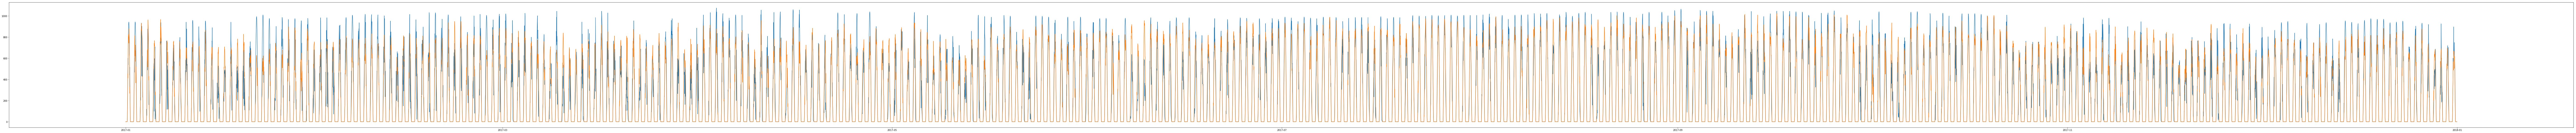

In [163]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure(figsize=(200,10))
plt.plot(test.index,test.GHI)
plt.plot(test.index,y_pred_test)